In [2061]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2062]:
df = pd.read_csv('Fire_Incident_Dispatch_Data.csv', nrows=10000)

In [1999]:
df.head(10)

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,1736549360150800,12/31/2017 11:59:45 PM,QUEENS,4936,133 AVE & 125 ST,QUEENS,11420.0,106.0,28.0,410.0,...,01/01/2018 12:00:27 AM,01/01/2018 12:04:51 AM,01/01/2018 12:16:17 AM,N,Y,306,297,1,0,0
1,1736534410121130,12/31/2017 11:58:46 PM,BRONX,3441,CRUGER AVE & ALLERTON AVE,BRONX,10467.0,49.0,15.0,211.0,...,01/01/2018 12:06:55 AM,NaN,01/01/2018 12:09:35 AM,N,N,0,0,1,0,0
2,1736502721511440,12/31/2017 11:58:41 PM,MANHATTAN,272,MANGIN & DELANCEY STS,MANHATTAN,10002.0,7.0,2.0,103.0,...,12/31/2017 11:59:13 PM,01/01/2018 12:02:14 AM,01/01/2018 12:11:48 AM,N,Y,213,200,3,3,1
3,1736532580141290,12/31/2017 11:57:55 PM,BROOKLYN,3258,AVENUE P & E 24 ST,BROOKLYN,11229.0,61.0,48.0,315.0,...,12/31/2017 11:58:37 PM,01/01/2018 12:02:08 AM,01/01/2018 01:20:58 AM,N,Y,253,245,1,0,0
4,1736578410250800,12/31/2017 11:57:49 PM,QUEENS,7841,ROOSEVELT AVE & 80 ST,QUEENS,11372.0,115.0,25.0,403.0,...,12/31/2017 11:58:18 PM,01/01/2018 12:01:03 AM,01/01/2018 12:09:55 AM,N,Y,194,179,3,2,1
5,1736571270241290,12/31/2017 11:57:43 PM,BROOKLYN,7127,BMT L @ DEKALB AVE & WYCKOFF AVE,BROOKLYN,NaN,NaN,NaN,NaN,...,NaN,NaN,12/31/2017 11:58:26 PM,N,N,0,0,0,0,0
6,1736516200211430,12/31/2017 11:57:35 PM,MANHATTAN,1620,AMSTERDAM AVE & 144 ST,MANHATTAN,10031.0,30.0,7.0,109.0,...,12/31/2017 11:59:03 PM,01/01/2018 12:02:24 AM,01/01/2018 12:07:34 AM,N,Y,289,234,1,1,1
7,1736542270121120,12/31/2017 11:57:26 PM,BRONX,4227,HUTCH RV PWAY & WESTCHESTER AVE,BRONX,NaN,NaN,NaN,NaN,...,12/31/2017 11:57:58 PM,12/31/2017 11:59:55 PM,01/01/2018 12:10:47 AM,N,Y,149,129,4,2,2
8,1736513450150800,12/31/2017 11:57:25 PM,QUEENS,1345,ROCKAWAY BEACH BLVD & BEACH 95 ST,QUEENS,11693.0,100.0,32.0,414.0,...,12/31/2017 11:58:31 PM,01/01/2018 12:00:07 AM,01/01/2018 12:15:07 AM,N,Y,162,116,3,2,1
9,1736547980121120,12/31/2017 11:56:32 PM,BRONX,4798,LORING PL & W FORDHAM RD,BRONX,10468.0,52.0,14.0,207.0,...,12/31/2017 11:56:59 PM,01/01/2018 12:00:35 AM,01/01/2018 12:11:09 AM,N,Y,243,233,3,2,1


In [2000]:
df[df.ZIPCODE.isnull()]

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
5,1736571270241290,12/31/2017 11:57:43 PM,BROOKLYN,7127,BMT L @ DEKALB AVE & WYCKOFF AVE,BROOKLYN,NaN,NaN,NaN,NaN,...,NaN,NaN,12/31/2017 11:58:26 PM,N,N,0,0,0,0,0
7,1736542270121120,12/31/2017 11:57:26 PM,BRONX,4227,HUTCH RV PWAY & WESTCHESTER AVE,BRONX,NaN,NaN,NaN,NaN,...,12/31/2017 11:57:58 PM,12/31/2017 11:59:55 PM,01/01/2018 12:10:47 AM,N,Y,149,129,4,2,2
48,1736587270221100,12/31/2017 11:40:57 PM,BRONX,8727,JACOBI HOSP NEW HOSP BLDG 6,BRONX,NaN,NaN,NaN,NaN,...,12/31/2017 11:42:33 PM,12/31/2017 11:47:32 PM,12/31/2017 11:58:59 PM,N,Y,395,318,3,2,1
52,1736573100111400,12/31/2017 11:38:29 PM,MANHATTAN,7310,IRT 1?2-3 - W 96 ST & BROADWAY,MANHATTAN,NaN,NaN,NaN,NaN,...,12/31/2017 11:39:19 PM,12/31/2017 11:43:13 PM,12/31/2017 11:51:59 PM,N,Y,284,247,3,2,1
70,1736510820141220,12/31/2017 11:29:48 PM,BROOKLYN,1082,WASHINGTON AVE & EMPIRE BLVD,BROOKLYN,NaN,NaN,NaN,NaN,...,12/31/2017 11:32:43 PM,12/31/2017 11:49:20 PM,01/01/2018 12:37:06 AM,N,Y,1172,1102,1,0,0
77,1736571270141210,12/31/2017 11:23:50 PM,BROOKLYN,7127,BMT L @ DEKALB AVE & WYCKOFF AVE,BROOKLYN,NaN,NaN,NaN,NaN,...,12/31/2017 11:24:34 PM,12/31/2017 11:27:48 PM,12/31/2017 11:36:24 PM,N,Y,238,208,3,2,1
80,1736514800150780,12/31/2017 11:22:59 PM,QUEENS,1480,OFFICE AT TOLL GATE PARKING AREA RIIS PK,QUEENS,NaN,NaN,NaN,NaN,...,12/31/2017 11:23:39 PM,12/31/2017 11:28:56 PM,12/31/2017 11:42:21 PM,N,Y,357,349,1,0,0
131,1736584090250760,12/31/2017 10:44:41 PM,QUEENS,8409,BELT PWAY BTW ROCKAWAY BLVD & 225 ST,QUEENS,NaN,NaN,NaN,NaN,...,12/31/2017 10:46:32 PM,12/31/2017 10:50:12 PM,12/31/2017 11:01:49 PM,N,Y,331,246,2,2,1
138,1736573110211330,12/31/2017 10:41:55 PM,MANHATTAN,7311,IRT 1 ? W 86 ST & BROADWAY,MANHATTAN,NaN,NaN,NaN,NaN,...,12/31/2017 10:42:20 PM,12/31/2017 10:45:40 PM,12/31/2017 10:50:52 PM,N,Y,225,214,1,0,0
154,1736514530111310,12/31/2017 10:33:51 PM,MANHATTAN,1453,RIVERSIDE DR & 122 ST,MANHATTAN,NaN,NaN,NaN,NaN,...,12/31/2017 10:34:11 PM,12/31/2017 10:43:53 PM,12/31/2017 10:52:38 PM,N,Y,602,582,0,1,0


In [2001]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
STARFIRE_INCIDENT_ID              10000 non-null int64
INCIDENT_DATETIME                 10000 non-null object
ALARM_BOX_BOROUGH                 10000 non-null object
ALARM_BOX_NUMBER                  10000 non-null int64
ALARM_BOX_LOCATION                10000 non-null object
INCIDENT_BOROUGH                  10000 non-null object
ZIPCODE                           9605 non-null float64
POLICEPRECINCT                    9605 non-null float64
CITYCOUNCILDISTRICT               9604 non-null float64
COMMUNITYDISTRICT                 9605 non-null float64
COMMUNITYSCHOOLDISTRICT           9601 non-null float64
CONGRESSIONALDISTRICT             9604 non-null float64
ALARM_SOURCE_DESCRIPTION_TX       10000 non-null object
ALARM_LEVEL_INDEX_DESCRIPTION     10000 non-null object
HIGHEST_ALARM_LEVEL               10000 non-null object
INCIDENT_CLASSIFICATION           10000 non-null objec

In [1954]:
print(df.isna().sum())

STARFIRE_INCIDENT_ID                 0
INCIDENT_DATETIME                    0
ALARM_BOX_BOROUGH                    0
ALARM_BOX_NUMBER                     0
ALARM_BOX_LOCATION                   0
INCIDENT_BOROUGH                     0
ZIPCODE                            395
POLICEPRECINCT                     395
CITYCOUNCILDISTRICT                396
COMMUNITYDISTRICT                  395
COMMUNITYSCHOOLDISTRICT            399
CONGRESSIONALDISTRICT              396
ALARM_SOURCE_DESCRIPTION_TX          0
ALARM_LEVEL_INDEX_DESCRIPTION        0
HIGHEST_ALARM_LEVEL                  0
INCIDENT_CLASSIFICATION              0
INCIDENT_CLASSIFICATION_GROUP        0
DISPATCH_RESPONSE_SECONDS_QY         0
FIRST_ASSIGNMENT_DATETIME           96
FIRST_ACTIVATION_DATETIME          130
FIRST_ON_SCENE_DATETIME           1641
INCIDENT_CLOSE_DATETIME              0
VALID_DISPATCH_RSPNS_TIME_INDC       0
VALID_INCIDENT_RSPNS_TIME_INDC       0
INCIDENT_RESPONSE_SECONDS_QY         0
INCIDENT_TRAVEL_TM_SECOND

In [2063]:
#finding unique value of zipcode
list_zip_code = df['ZIPCODE'].unique()
list_zip_code = list_zip_code[~np.isnan(list_zip_code)]
len(list_zip_code)

195

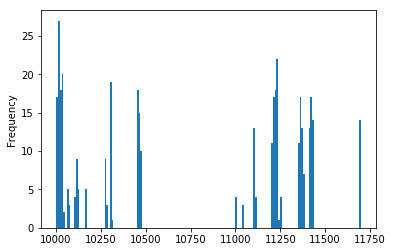

In [2064]:
random_zip_value.plot(kind='hist', bins=170)

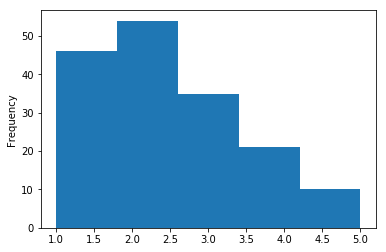

In [2065]:
random_zip_value.value_counts().plot('hist', bins=5)
plt.show()

In [2066]:
#filling missing values in column, ZIPCODE
df.ZIPCODE = df.ZIPCODE.apply(lambda x: random.choice(list_zip_code) if np.isnan(x) else x)

In [2004]:
#converting values in ZIPCODE to int from float
df['ZIPCODE'] = df['ZIPCODE'].astype(int)

In [1960]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
STARFIRE_INCIDENT_ID              10000 non-null int64
INCIDENT_DATETIME                 10000 non-null object
ALARM_BOX_BOROUGH                 10000 non-null object
ALARM_BOX_NUMBER                  10000 non-null int64
ALARM_BOX_LOCATION                10000 non-null object
INCIDENT_BOROUGH                  10000 non-null object
ZIPCODE                           10000 non-null int64
POLICEPRECINCT                    9605 non-null float64
CITYCOUNCILDISTRICT               9604 non-null float64
COMMUNITYDISTRICT                 9605 non-null float64
COMMUNITYSCHOOLDISTRICT           9601 non-null float64
CONGRESSIONALDISTRICT             9604 non-null float64
ALARM_SOURCE_DESCRIPTION_TX       10000 non-null object
ALARM_LEVEL_INDEX_DESCRIPTION     10000 non-null object
HIGHEST_ALARM_LEVEL               10000 non-null object
INCIDENT_CLASSIFICATION           10000 non-null object

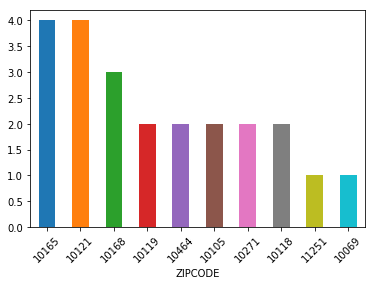

In [625]:
#10 bottom zipcodes with low rate incident
df.groupby('ZIPCODE').count().sort_values(\
    'STARFIRE_INCIDENT_ID', ascending=False).\
    iloc[-10:,1].plot.bar(rot=45)

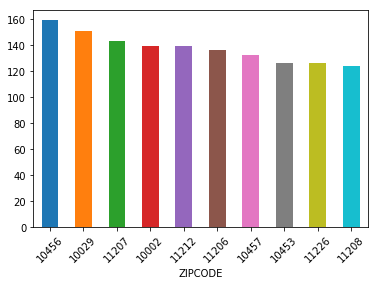

In [626]:
#10 top zipcodes with high rate accident
df.groupby('ZIPCODE').count().sort_values(\
    'STARFIRE_INCIDENT_ID', ascending=False).\
    iloc[:10,1].plot.bar(rot=45)

In [2005]:
#droping rows with zero value in INCIDENT_RESPONSE_SECOND_QY
df.drop(df.loc[df['INCIDENT_RESPONSE_SECONDS_QY']==0].index, inplace=True)

In [2006]:
#droping rows with zero value in INCIDENT_RESPONSE_SECOND_QY
df.drop(df.loc[df['INCIDENT_TRAVEL_TM_SECONDS_QY']==0].index, inplace=True)

In [2007]:
#number of incident in each zipcode
IN_I = df.groupby('ZIPCODE').count().STARFIRE_INCIDENT_ID
IN = pd.DataFrame(IN_I)

In [2008]:
# number of each classified incident in each zipcode
i = df.groupby('ZIPCODE').INCIDENT_CLASSIFICATION.value_counts().unstack(fill_value=0)

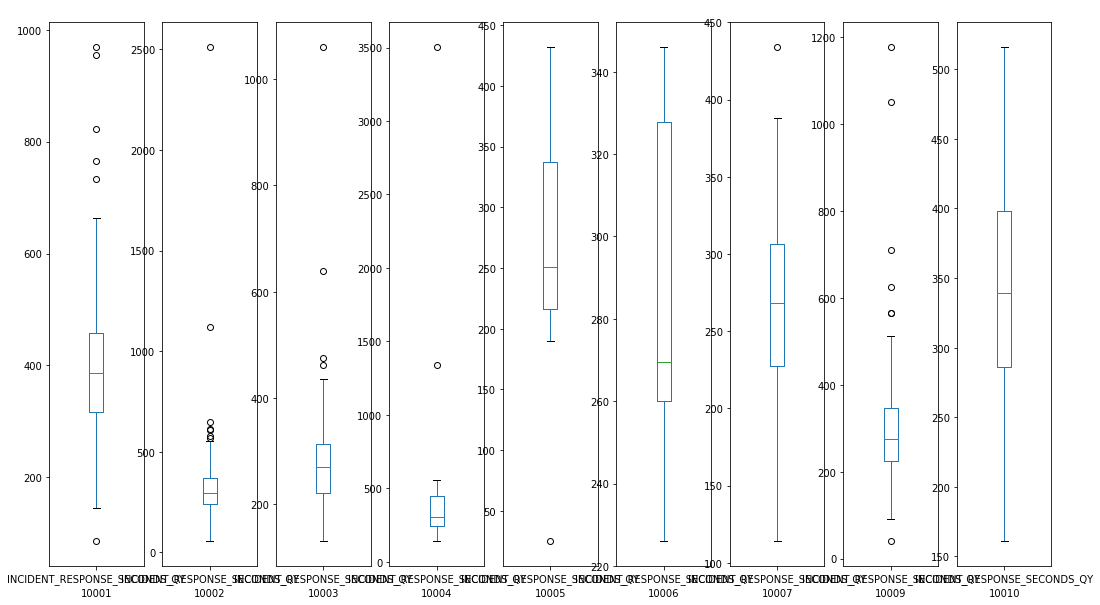

In [2009]:
RD = df.groupby('ZIPCODE').DISPATCH_RESPONSE_SECONDS_QY
plt.figure(figsize=(20,10))


index = 1
for name, groupp in RS:
    if index < 10:
        plt.subplot(1,10, index)
        groupp.plot.box(subplots=True)
        plt.xlabel(name)
        plt.title(' ')
    index+=1

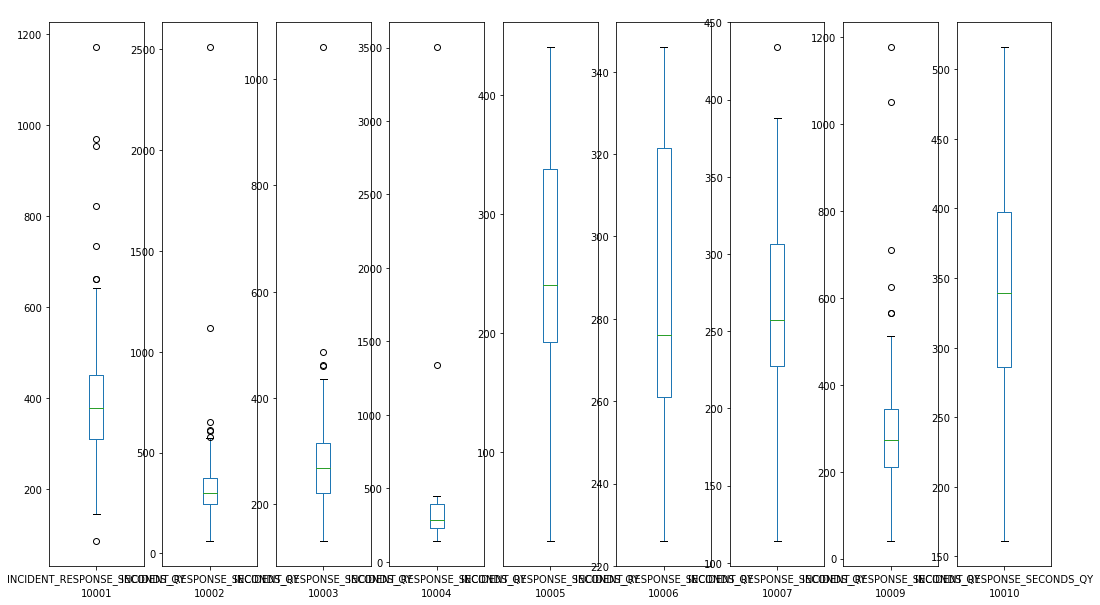

In [2010]:
#incident response seconds in each zipcode
RS = df.groupby('ZIPCODE').INCIDENT_RESPONSE_SECONDS_QY
plt.figure(figsize=(20,10))


index = 1
for name, groupp in RS:
    if index < 10:
        plt.subplot(1,10, index)
        groupp.plot.box(subplots=True)
        plt.xlabel(name)
        plt.title(' ')
    index+=1
    

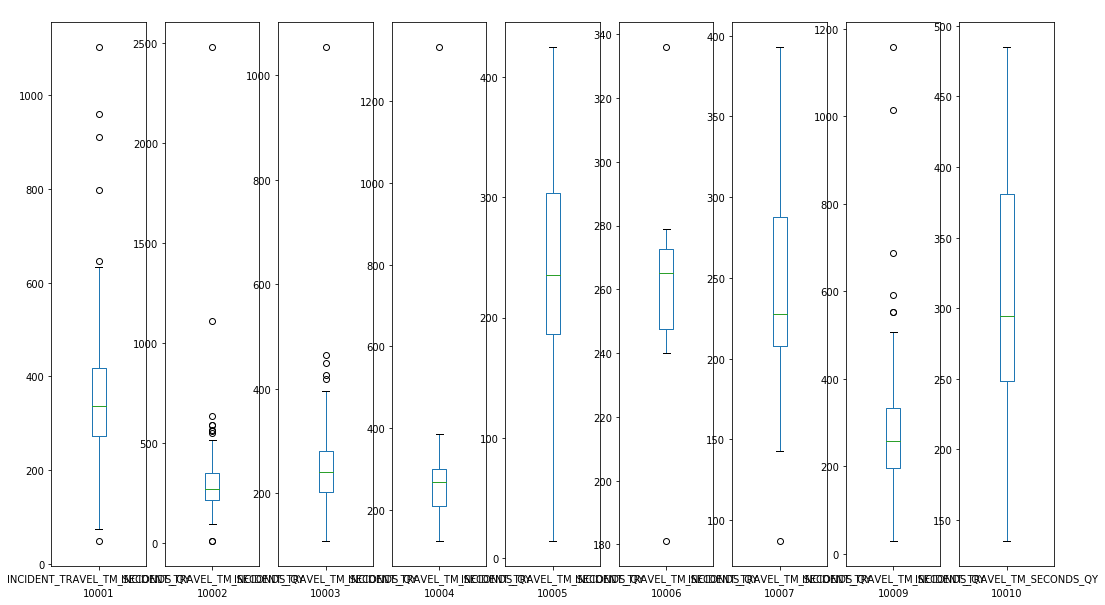

In [2011]:
#incident travel time response seconds in each zipcode
RT = df.groupby('ZIPCODE').INCIDENT_TRAVEL_TM_SECONDS_QY
plt.figure(figsize=(20,10))


index = 1
for name, groupp in RT:
    if index < 10:
        plt.subplot(1,10, index)
        groupp.plot.box(subplots=True)
        plt.xlabel(name)
        plt.title(' ')
    index+=1
    

there are outliers in incident response and travel time seconds and dispatch response which should be removed.

In [2012]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

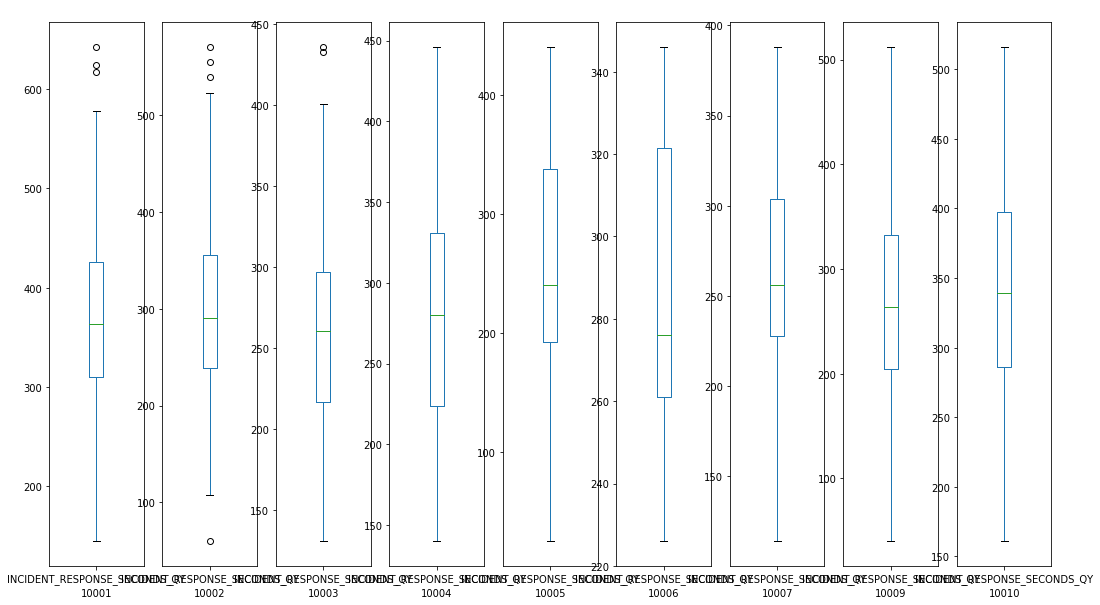

In [2013]:
index = 1
plt.figure(figsize=(20,10))
ls =[]
for name, groupp in RS:
    groupp = groupp[Remove_Outlier_Indices(groupp)]
    #l = [name, groupp.min(), groupp.max(), groupp.std()]
    l = [name, groupp.mean()]
    ls.append(l)


    if index < 10:
        plt.subplot(1,10, index)
        groupp.plot.box(subplots=True)#, ax=axs[index])
        plt.xlabel(name)
        plt.title(' ')
    index+=1

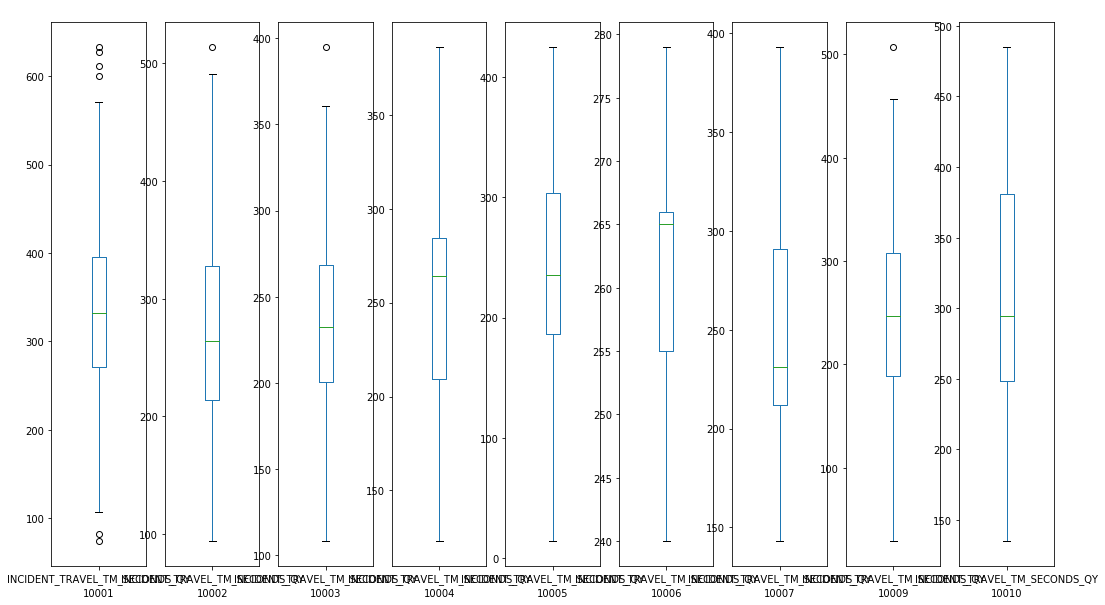

In [2014]:
index = 1
plt.figure(figsize=(20,10))
lt =[]
for name, groupp in RT:
    groupp = groupp[Remove_Outlier_Indices(groupp)]
    #l = [name, groupp.min(), groupp.max(), groupp.std()]
    l = [name, groupp.mean()]
    lt.append(l)


    if index < 10:
        plt.subplot(1,10, index)
        groupp.plot.box(subplots=True)#, ax=axs[index])
        plt.xlabel(name)
        plt.title(' ')
    index+=1

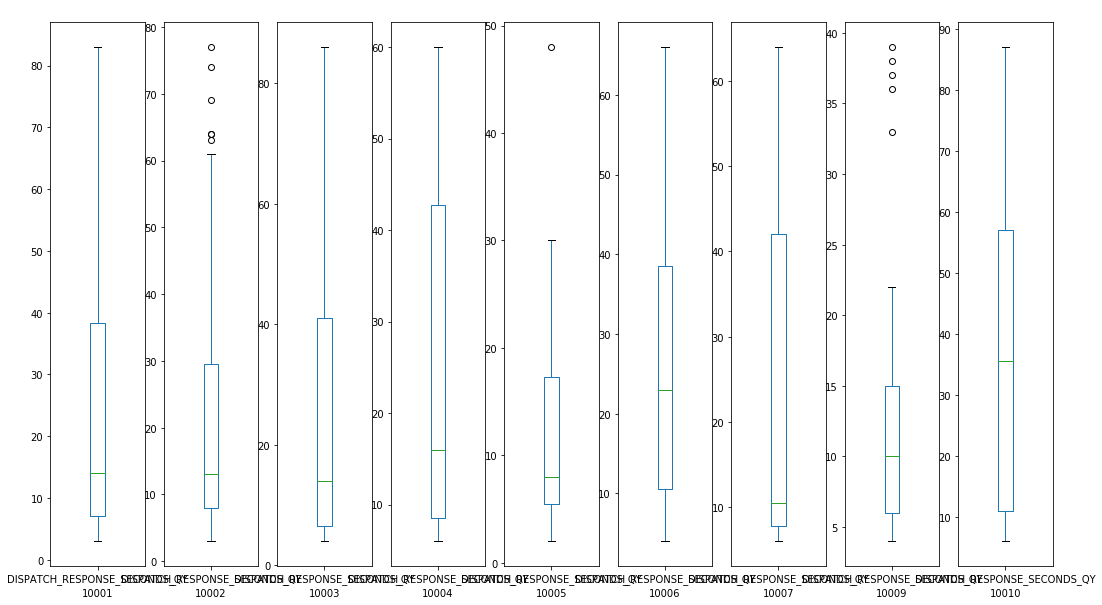

In [2015]:
index = 1
plt.figure(figsize=(20,10))
ld =[]
for name, groupp in RD:
    groupp = groupp[Remove_Outlier_Indices(groupp)]
    #l = [name, groupp.min(), groupp.max(), groupp.std()]
    l = [name, groupp.mean()]
    ld.append(l)


    if index < 10:
        plt.subplot(1,10, index)
        groupp.plot.box(subplots=True)#, ax=axs[index])
        plt.xlabel(name)
        plt.title(' ')
    index+=1

In [2016]:
#average time for response to incident in each group 
ss = pd.DataFrame(ls, columns=['ZIPCODE', 'AVE_INCIDENT_RESPONSE_SECOND'])
ss = ss.set_index('ZIPCODE')

In [2017]:
#average time for travel to the scene
ts = pd.DataFrame(lt, columns=['ZIPCODE', 'AVE_INCIDENT_TRAVEL_SECOND'])
ts = ts.set_index('ZIPCODE')

In [2018]:
#average time for dispatch response to incidents
td = pd.DataFrame(ld, columns=['ZIPCODE', 'AVE_DISPATCH_RESPONSE_SECONDS'])
td = td.set_index('ZIPCODE')

In [2019]:
#merging four dataframes
df2 = pd.concat([IN, ts, ss, td, i], axis=1)
df2.reset_index(inplace=True)
df2.head()

,ZIPCODE,STARFIRE_INCIDENT_ID,AVE_INCIDENT_TRAVEL_SECOND,AVE_INCIDENT_RESPONSE_SECOND,AVE_DISPATCH_RESPONSE_SECONDS,Abandoned Derelict Vehicle Fire,Alarm System - Defective,Alarm System - Testing,Alarm System - Unnecessary,Assist Civilian - Non-Medical,...,Transit System Emergency,Undefined Emergency,Untenanted Building Fire,Utility Emergency - Electric,Utility Emergency - Gas,Utility Emergency - Steam,Utility Emergency - Undefined,Utility Emergency - Water,Vehicle Accident - Other,Vehicle Accident - With Extrication
0,10001,78,334.291667,364.457143,23.918919,0,5,1,5,23,...,0,0,0,2,1,0,0,4,1,0
1,10002,110,277.580000,303.951923,20.783019,0,4,0,2,31,...,0,0,0,2,7,3,0,7,3,0
2,10003,61,235.000000,266.789474,24.728814,0,7,0,5,6,...,0,0,0,2,2,2,0,5,3,0
3,10004,15,256.857143,284.692308,26.500000,0,4,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,10005,11,229.545455,249.545455,14.100000,0,2,0,0,2,...,0,0,0,0,0,0,0,0,1,0


In [2020]:
#population dataset
df3 = pd.read_csv('~/Downloads/2010+Census+Population+By+Zipcode+(ZCTA).csv')

In [2021]:
df3.head()

,Zip Code ZCTA,2010 Census Population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [2022]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33092 entries, 0 to 33091
Data columns (total 2 columns):
Zip Code ZCTA             33092 non-null int64
2010 Census Population    33092 non-null int64
dtypes: int64(2)
memory usage: 517.1 KB


In [2023]:
#merging population dataset to the dataset that was made of the features
df4 = df2.merge(df3, how='inner', left_on='ZIPCODE', right_on='Zip Code ZCTA')

In [2024]:
df4 = df4.drop('Zip Code ZCTA', 1)

In [2025]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 188
Data columns (total 63 columns):
ZIPCODE                                              189 non-null int64
STARFIRE_INCIDENT_ID                                 189 non-null int64
AVE_INCIDENT_TRAVEL_SECOND                           189 non-null float64
AVE_INCIDENT_RESPONSE_SECOND                         189 non-null float64
AVE_DISPATCH_RESPONSE_SECONDS                        189 non-null float64
Abandoned Derelict Vehicle Fire                      189 non-null int64
Alarm System - Defective                             189 non-null int64
Alarm System - Testing                               189 non-null int64
Alarm System - Unnecessary                           189 non-null int64
Assist Civilian - Non-Medical                        189 non-null int64
Automobile Fire                                      189 non-null int64
Brush Fire                                           189 non-null int64
Carbon Monoxide - Code 1 

In [2030]:
df4.head()

,ZIPCODE,STARFIRE_INCIDENT_ID,AVE_INCIDENT_TRAVEL_SECOND,AVE_INCIDENT_RESPONSE_SECOND,AVE_DISPATCH_RESPONSE_SECONDS,Abandoned Derelict Vehicle Fire,Alarm System - Defective,Alarm System - Testing,Alarm System - Unnecessary,Assist Civilian - Non-Medical,...,Undefined Emergency,Untenanted Building Fire,Utility Emergency - Electric,Utility Emergency - Gas,Utility Emergency - Steam,Utility Emergency - Undefined,Utility Emergency - Water,Vehicle Accident - Other,Vehicle Accident - With Extrication,2010 Census Population
0,10001,78,334.291667,364.457143,23.918919,0,5,1,5,23,...,0,0,2,1,0,0,4,1,0,21102
1,10002,110,277.580000,303.951923,20.783019,0,4,0,2,31,...,0,0,2,7,3,0,7,3,0,81410
2,10003,61,235.000000,266.789474,24.728814,0,7,0,5,6,...,0,0,2,2,2,0,5,3,0,56024
3,10004,15,256.857143,284.692308,26.500000,0,4,0,0,1,...,0,0,0,0,0,0,0,1,0,3089
4,10005,11,229.545455,249.545455,14.100000,0,2,0,0,2,...,0,0,0,0,0,0,0,1,0,7135


In [2031]:
df4.set_index('ZIPCODE')

,STARFIRE_INCIDENT_ID,AVE_INCIDENT_TRAVEL_SECOND,AVE_INCIDENT_RESPONSE_SECOND,AVE_DISPATCH_RESPONSE_SECONDS,Abandoned Derelict Vehicle Fire,Alarm System - Defective,Alarm System - Testing,Alarm System - Unnecessary,Assist Civilian - Non-Medical,Automobile Fire,...,Undefined Emergency,Untenanted Building Fire,Utility Emergency - Electric,Utility Emergency - Gas,Utility Emergency - Steam,Utility Emergency - Undefined,Utility Emergency - Water,Vehicle Accident - Other,Vehicle Accident - With Extrication,2010 Census Population
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10001,78,334.291667,364.457143,23.918919,0,5,1,5,23,0,...,0,0,2,1,0,0,4,1,0,21102
10002,110,277.580000,303.951923,20.783019,0,4,0,2,31,0,...,0,0,2,7,3,0,7,3,0,81410
10003,61,235.000000,266.789474,24.728814,0,7,0,5,6,0,...,0,0,2,2,2,0,5,3,0,56024
10004,15,256.857143,284.692308,26.500000,0,4,0,0,1,0,...,0,0,0,0,0,0,0,1,0,3089
10005,11,229.545455,249.545455,14.100000,0,2,0,0,2,0,...,0,0,0,0,0,0,0,1,0,7135
10006,7,261.000000,287.571429,27.285714,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,3011
10007,28,247.518519,260.259259,24.678571,0,3,1,4,2,0,...,0,0,0,1,1,0,1,0,0,6988
10009,77,246.197183,264.760563,12.181818,0,4,0,0,17,0,...,1,0,1,8,1,0,7,1,0,61347
10010,38,308.184211,343.263158,35.078947,0,11,0,4,6,0,...,0,0,0,2,0,0,0,0,0,31834


In [2037]:
#making target column based on number on incident in each zipcode
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin


In [2038]:
cut_points = [40]
labels = ['safe', 'unsafe']
df4['LEVEL_OF_SAFETY'] = binning(df4["STARFIRE_INCIDENT_ID"], cut_points, labels=labels)

In [2039]:
df4.head()

,ZIPCODE,STARFIRE_INCIDENT_ID,AVE_INCIDENT_TRAVEL_SECOND,AVE_INCIDENT_RESPONSE_SECOND,AVE_DISPATCH_RESPONSE_SECONDS,Abandoned Derelict Vehicle Fire,Alarm System - Defective,Alarm System - Testing,Alarm System - Unnecessary,Assist Civilian - Non-Medical,...,Untenanted Building Fire,Utility Emergency - Electric,Utility Emergency - Gas,Utility Emergency - Steam,Utility Emergency - Undefined,Utility Emergency - Water,Vehicle Accident - Other,Vehicle Accident - With Extrication,2010 Census Population,LEVEL_OF_SAFETY
0,10001,78,334.291667,364.457143,23.918919,0,5,1,5,23,...,0,2,1,0,0,4,1,0,21102,unsafe
1,10002,110,277.580000,303.951923,20.783019,0,4,0,2,31,...,0,2,7,3,0,7,3,0,81410,unsafe
2,10003,61,235.000000,266.789474,24.728814,0,7,0,5,6,...,0,2,2,2,0,5,3,0,56024,unsafe
3,10004,15,256.857143,284.692308,26.500000,0,4,0,0,1,...,0,0,0,0,0,0,1,0,3089,safe
4,10005,11,229.545455,249.545455,14.100000,0,2,0,0,2,...,0,0,0,0,0,0,1,0,7135,safe


In [2040]:
df4.set_index('ZIPCODE')

,STARFIRE_INCIDENT_ID,AVE_INCIDENT_TRAVEL_SECOND,AVE_INCIDENT_RESPONSE_SECOND,AVE_DISPATCH_RESPONSE_SECONDS,Abandoned Derelict Vehicle Fire,Alarm System - Defective,Alarm System - Testing,Alarm System - Unnecessary,Assist Civilian - Non-Medical,Automobile Fire,...,Untenanted Building Fire,Utility Emergency - Electric,Utility Emergency - Gas,Utility Emergency - Steam,Utility Emergency - Undefined,Utility Emergency - Water,Vehicle Accident - Other,Vehicle Accident - With Extrication,2010 Census Population,LEVEL_OF_SAFETY
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10001,78,334.291667,364.457143,23.918919,0,5,1,5,23,0,...,0,2,1,0,0,4,1,0,21102,unsafe
10002,110,277.580000,303.951923,20.783019,0,4,0,2,31,0,...,0,2,7,3,0,7,3,0,81410,unsafe
10003,61,235.000000,266.789474,24.728814,0,7,0,5,6,0,...,0,2,2,2,0,5,3,0,56024,unsafe
10004,15,256.857143,284.692308,26.500000,0,4,0,0,1,0,...,0,0,0,0,0,0,1,0,3089,safe
10005,11,229.545455,249.545455,14.100000,0,2,0,0,2,0,...,0,0,0,0,0,0,1,0,7135,safe
10006,7,261.000000,287.571429,27.285714,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,3011,safe
10007,28,247.518519,260.259259,24.678571,0,3,1,4,2,0,...,0,0,1,1,0,1,0,0,6988,safe
10009,77,246.197183,264.760563,12.181818,0,4,0,0,17,0,...,0,1,8,1,0,7,1,0,61347,unsafe
10010,38,308.184211,343.263158,35.078947,0,11,0,4,6,0,...,0,0,2,0,0,0,0,0,31834,safe


In [2041]:
#Change safe, unsafe of column LEVEL_OF_SAFETY to 1/0
df4.LEVEL_OF_SAFETY = df4.LEVEL_OF_SAFETY.map({'safe':1, 'unsafe':0})

In [2042]:
#make array target(Y) and data(X)
Y = df4.LEVEL_OF_SAFETY.astype('category')
X = df4.drop('LEVEL_OF_SAFETY', axis=1)

In [2043]:
X = X.drop('STARFIRE_INCIDENT_ID', axis=1)
X = X.set_index('ZIPCODE')

In [2044]:
X.describe()

,AVE_INCIDENT_TRAVEL_SECOND,AVE_INCIDENT_RESPONSE_SECOND,AVE_DISPATCH_RESPONSE_SECONDS,Abandoned Derelict Vehicle Fire,Alarm System - Defective,Alarm System - Testing,Alarm System - Unnecessary,Assist Civilian - Non-Medical,Automobile Fire,Brush Fire,...,Undefined Emergency,Untenanted Building Fire,Utility Emergency - Electric,Utility Emergency - Gas,Utility Emergency - Steam,Utility Emergency - Undefined,Utility Emergency - Water,Vehicle Accident - Other,Vehicle Accident - With Extrication,2010 Census Population
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,278.248016,303.233987,21.559356,0.005291,2.174603,0.232804,0.936508,7.005291,0.169312,0.026455,...,0.158730,0.005291,0.798942,2.359788,0.809524,0.010582,3.021164,1.306878,0.037037,43568.899471
std,56.004446,57.147060,8.323220,0.072739,2.534064,0.493342,1.366853,6.985165,0.441118,0.217184,...,0.394363,0.072739,1.087550,2.380701,1.240159,0.102595,3.056137,1.276217,0.189354,27306.791525
min,152.250000,190.666667,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,247.518519,267.000000,14.833333,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,24090.000000
50%,267.372340,294.076923,20.454545,0.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000,0.000000,39665.000000
75%,298.000000,324.775510,26.500000,0.000000,4.000000,0.000000,1.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,5.000000,2.000000,0.000000,61347.000000
max,605.000000,629.000000,45.500000,1.000000,11.000000,2.000000,11.000000,37.000000,3.000000,2.000000,...,2.000000,1.000000,5.000000,12.000000,8.000000,1.000000,17.000000,7.000000,1.000000,109931.000000


In [2049]:
#making model by logisticresression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
steps = [('scaler', StandardScaler()),('logreg', LogisticRegression())]
pipeline = Pipeline(steps)
c_space = np.logspace(-3, 5, 12)
parameters = {'logreg__C':c_space,'logreg__penalty':['l1', 'l2']}
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40, random_state=42)
cvl = GridSearchCV(pipeline, parameters, cv=5)
cvl.fit(X_train, y_train)
y_pred = cvl.predict(X_test)
r2 = cvl.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned CVl Parameter: {}".format(cvl.best_params_))
print("Tuned CVl Accuracy: {}".format(cvl.best_score_))
print("Tuned CVl R squared: {}".format(r2))
print("Tuned CVl MSE: {}".format(mse))

Tuned CVl Parameter: {'logreg__C': 0.1519911082952933, 'logreg__penalty': 'l2'}
Tuned CVl Accuracy: 0.9646017699115044
Tuned CVl R squared: 0.9473684210526315
Tuned CVl MSE: 0.05263157894736842


In [2050]:
#printing confusion metrix to value the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46  2]
 [ 2 26]]
             precision    recall  f1-score   support

          0       0.96      0.96      0.96        48
          1       0.93      0.93      0.93        28

avg / total       0.95      0.95      0.95        76



In [2051]:
#making a model by SVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
steps = [('scaler', StandardScaler()),('SVC', SVC())]
pipeline = Pipeline(steps)
c_space = [1, 10, 100]
gamma = [0.1, 0.01]
parameters = {'SVC__C':c_space,'SVC__gamma':gamma}
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40, random_state=42)
cvs = GridSearchCV(pipeline, parameters, cv=5)
cvs.fit(X_train, y_train)
y_pred = cvs.predict(X_test)
r2 = cvs.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned CVs Parameter: {}".format(cvs.best_params_))
print("Tuned CVs Accuracy: {}".format(cvs.best_score_))
print("Tuned CVs R squared: {}".format(r2))
print("Tuned CVs MSE: {}".format(mse))

Tuned CVs Parameter: {'SVC__C': 10, 'SVC__gamma': 0.01}
Tuned CVs Accuracy: 0.9557522123893806
Tuned CVs R squared: 0.9342105263157895
Tuned CVs MSE: 0.06578947368421052


In [2052]:
#printing confusion metrix to value the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[45  3]
 [ 2 26]]
             precision    recall  f1-score   support

          0       0.96      0.94      0.95        48
          1       0.90      0.93      0.91        28

avg / total       0.94      0.93      0.93        76



In [2053]:
#making a model by randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
steps = [('scaler', StandardScaler()),('rf', RandomForestClassifier())]
pipeline = Pipeline(steps)
parameters = {"rf__max_depth": [5, None],
              "rf__n_estimators":[5,10],
              "rf__max_features": randint(1, 20),
              "rf__min_samples_leaf": randint(1, 20),
              "rf__criterion": ["gini", "entropy"]}

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40, random_state=42)
cvr = RandomizedSearchCV(pipeline, parameters, cv=5)
cvr.fit(X_train, y_train)
y_pred = cvr.predict(X_test)
r2 = cvr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned CVr Parameter: {}".format(cvr.best_params_))
print("Tuned CVr Accuracy: {}".format(cvr.best_score_))
print("Tuned CVr R squared: {}".format(r2))
print("Tuned CVr MSE: {}".format(mse))

Tuned CVr Parameter: {'rf__criterion': 'gini', 'rf__max_depth': None, 'rf__max_features': 4, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 10}
Tuned CVr Accuracy: 0.9557522123893806
Tuned CVr R squared: 0.8947368421052632
Tuned CVr MSE: 0.10526315789473684


In [2054]:
#printing confusion metrix to value the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[43  5]
 [ 3 25]]
             precision    recall  f1-score   support

          0       0.93      0.90      0.91        48
          1       0.83      0.89      0.86        28

avg / total       0.90      0.89      0.90        76



In [2055]:
#important features after modeling by Randomforest
clf = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features=11,min_samples_leaf=7 )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns)
#feature_imp

In [2056]:
#important features after modeling by LogisticRegression
logreg = LogisticRegression(C=0.001, penalty='l2')
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 3)
fit = rfe.fit(X_train, y_train)
print("top features: %d" %(fit.n_features_))
print("selected features: %s" %(fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

top features: 3
selected features: [False False  True False False False False  True False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
Feature Ranking: [14 15  1 58  3 25  7  1 23 40 10 19 33 43 57 55 16 24 39 56 54 31  1  9
  8 38 28 29  6 11 44 46 34 50 45 17 52 53 20  5 21 49 26 41 37 22 35 27
 30 32 42 36 59 18  4 12 47  2 13 48 51]
